In [2]:
import numpy as np
import matplotlib.pyplot as plt
ntheta = 50  # number of angles (rotations)
ptheta = 50  # holography chunk size for GPU processing
binning = 1
niter = 33
iter_step = 8
ndist = 4
st = 0
same_probe = True
flg_show = True

cropx_left = 256+64
cropx_right = 256-64
cropy_up = 0
cropy_down = 256+128+32+16+64-16-32+64

n = (2048-cropx_left-cropx_right)//2**binning

ne = (2048+256+128+96)//2**binning
pn = 32  # tomography chunk size for GPU processing
center = n/2  # rotation axis

# ID16a setup
detector_pixelsize = 3e-6
energy = 17.05 #[keV] xray energy
focusToDetectorDistance = 1.208 # [m]
sx0 = -2.493e-3
z1 = np.array([1.5335e-3,1.7065e-3,2.3975e-3,3.8320e-3])[:ndist]-sx0
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1
voxelsize = detector_pixelsize/magnifications[0]*2**binning  # object voxel size
norm_magnifications = magnifications/magnifications[0]
distances = distances*norm_magnifications**2

z1p = z1[0]  # positions of the probe for reconstruction
z2p = z1-np.tile(z1p, len(z1))
magnifications2 = (z1p+z2p)/z1p
distances2 = (z1p*z2p)/(z1p+z2p)
norm_magnifications2 = magnifications2/(z1p/z1[0])  # 
distances2 = distances2*norm_magnifications2**2
distances2 = distances2*(z1p/z1)**2
print(norm_magnifications*ne/n)

[1.64583333 1.5780326  1.35506552 1.0477388 ]


[1.27425735e+08 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


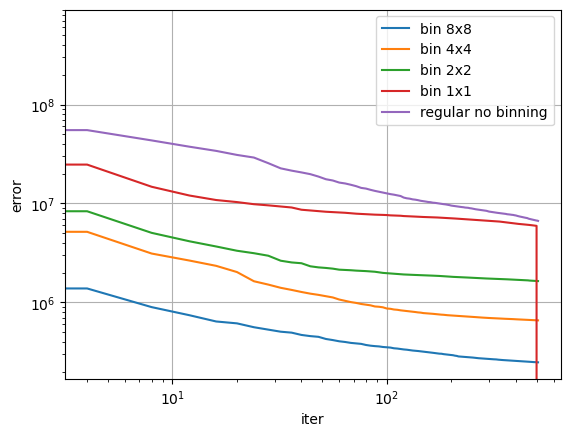

In [96]:
lbinninga = [3,2,1,0]
for lbinning in lbinninga[:4]:
    n = 768//2**lbinning
    conv = np.load(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_probe}_{n}_{ntheta}_{ndist}_{st}/conv.npy')
    plt.plot(np.arange(0,512,4),conv[:512:4],label=f'bin {2**lbinning}x{2**lbinning}')
    

# n = 192
# conv = np.load(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_probe}_{n}_{ntheta}_{ndist}_{st}/conv.npy')
# plt.loglog(np.arange(0,512,4),conv[::4]/4)

n=768
conv = np.load(f'/data/vnikitin/holo/3d_ald/rreg_probe_{same_probe}_{n}_{ntheta}_{ndist}_{st}/conv.npy')
print(conv)
plt.loglog(np.arange(0,512,4),conv[:512:4],label=f'regular no binning')
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('error')
plt.grid()
plt.legend()

plt.show()
